In [486]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

### Importing the Data

In [76]:
df = pd.read_csv(r"D:\Study\BA\TEST\Students Adaptability Level in Online Education\students_adaptability_level_online_education.csv")

### Basic Check on data

In [77]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [78]:
df.shape

(1205, 14)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [80]:
df.isna().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

In [81]:
df.nunique()

Gender                 2
Age                    6
Education Level        3
Institution Type       2
IT Student             2
Location               2
Load-shedding          2
Financial Condition    3
Internet Type          2
Network Type           3
Class Duration         3
Self Lms               2
Device                 3
Adaptivity Level       3
dtype: int64

### Checking P-Value

In [82]:
from scipy.stats import chi2_contingency
for col in df.columns:
    if col not in ['weight','Adaptivity Level']:
        table = pd.crosstab(index=df[col], columns=df['Adaptivity Level'], margins=True)
        result = chi2_contingency(table)
        print(col,'p-value =',result[1].round(4))

Gender p-value = 0.0364
Age p-value = 0.0
Education Level p-value = 0.0
Institution Type p-value = 0.0
IT Student p-value = 0.0033
Location p-value = 0.0
Load-shedding p-value = 0.1258
Financial Condition p-value = 0.0
Internet Type p-value = 0.0018
Network Type p-value = 0.0004
Class Duration p-value = 0.0
Self Lms p-value = 0.0
Device p-value = 0.0


##### Load-shedding having a p-Value above 0.05

### Checking the Unique Values within the columns

In [83]:
df["Gender"].value_counts()

Boy     663
Girl    542
Name: Gender, dtype: int64

In [84]:
df.groupby(["Gender","Adaptivity Level"])["Age"].count().unstack()

Adaptivity Level,High,Low,Moderate
Gender,,,
Boy,71,245,347
Girl,29,235,278


In [85]:
df["Age"].value_counts()

21-25    374
11-15    353
16-20    278
1-5       81
26-30     68
6-10      51
Name: Age, dtype: int64

In [86]:
df.groupby(["Age","Adaptivity Level"])["Age"].count().unstack()

Adaptivity Level,High,Low,Moderate
Age,,,
1-5,NaN,17.0,64.0
11-15,28.0,120.0,205.0
16-20,5.0,144.0,129.0
21-25,38.0,139.0,197.0
26-30,12.0,36.0,20.0
6-10,17.0,24.0,10.0


In [87]:
df["Education Level"].value_counts()

School        530
University    456
College       219
Name: Education Level, dtype: int64

In [88]:
df.groupby(["Education Level","Adaptivity Level"])["Age"].count().unstack()

Adaptivity Level,High,Low,Moderate
Education Level,,,
College,3,120,96
School,47,182,301
University,50,178,228


In [89]:
df["Institution Type"].value_counts()

Non Government    823
Government        382
Name: Institution Type, dtype: int64

In [90]:
df.groupby(["Institution Type","Adaptivity Level"])["Age"].count().unstack()

Adaptivity Level,High,Low,Moderate
Institution Type,,,
Government,20,234,128
Non Government,80,246,497


In [91]:
df["IT Student"].value_counts()

No     901
Yes    304
Name: IT Student, dtype: int64

In [92]:
df.groupby(["IT Student","Adaptivity Level"])["Age"].count().unstack()

Adaptivity Level,High,Low,Moderate
IT Student,,,
No,67,391,443
Yes,33,89,182


In [93]:
df["Location"].value_counts()

Yes    935
No     270
Name: Location, dtype: int64

In [94]:
df.groupby(["Location","Adaptivity Level"])["Age"].count().unstack()

Adaptivity Level,High,Low,Moderate
Location,,,
No,8,171,91
Yes,92,309,534


In [95]:
df["Load-shedding"].value_counts()

Low     1004
High     201
Name: Load-shedding, dtype: int64

In [96]:
df.groupby(["Load-shedding","Adaptivity Level"])["Age"].count().unstack()

Adaptivity Level,High,Low,Moderate
Load-shedding,,,
High,13,100,88
Low,87,380,537


In [97]:
df["Financial Condition"].value_counts()

Mid     878
Poor    242
Rich     85
Name: Financial Condition, dtype: int64

In [98]:
df.groupby(["Financial Condition","Adaptivity Level"])["Age"].count().unstack()

Adaptivity Level,High,Low,Moderate
Financial Condition,,,
Mid,36,341,501
Poor,22,129,91
Rich,42,10,33


In [99]:
df["Internet Type"].value_counts()

Mobile Data    695
Wifi           510
Name: Internet Type, dtype: int64

In [101]:
df.groupby(["Internet Type","Adaptivity Level"])["Age"].count().unstack()

Adaptivity Level,High,Low,Moderate
Internet Type,,,
Mobile Data,36,288,371
Wifi,64,192,254


In [102]:
df["Network Type"].value_counts()

4G    775
3G    411
2G     19
Name: Network Type, dtype: int64

In [103]:
df.groupby(["Network Type","Adaptivity Level"])["Age"].count().unstack()

Adaptivity Level,High,Low,Moderate
Network Type,,,
2G,NaN,16.0,3.0
3G,22.0,186.0,203.0
4G,78.0,278.0,419.0


In [104]:
df["Class Duration"].value_counts()

1-3    840
3-6    211
0      154
Name: Class Duration, dtype: int64

In [105]:
df.groupby(["Class Duration","Adaptivity Level"])["Age"].count().unstack()

Adaptivity Level,High,Low,Moderate
Class Duration,,,
0,NaN,144.0,10.0
1-3,82.0,290.0,468.0
3-6,18.0,46.0,147.0


In [106]:
df["Device"].value_counts()

Mobile      1013
Computer     162
Tab           30
Name: Device, dtype: int64

In [107]:
df.groupby(["Device","Adaptivity Level"])["Age"].count().unstack()

Adaptivity Level,High,Low,Moderate
Device,,,
Computer,30,40,92
Mobile,68,438,507
Tab,2,2,26


### Target Variable

In [108]:
df["Adaptivity Level"].value_counts()

Moderate    625
Low         480
High        100
Name: Adaptivity Level, dtype: int64

### Defining the Categorical Values:- 
#### Moderate = 0, 
#### Low =1, 
#### High = 2

In [109]:
df["Adaptivity Level"] = df["Adaptivity Level"].replace({"Moderate":0,
                               "Low":1,
                               "High":2})

### Converting the Values where unique is less than 2 to dummy values (0 or 1)

In [110]:
df.nunique()<3

Gender                  True
Age                    False
Education Level        False
Institution Type        True
IT Student              True
Location                True
Load-shedding           True
Financial Condition    False
Internet Type           True
Network Type           False
Class Duration         False
Self Lms                True
Device                 False
Adaptivity Level       False
dtype: bool

In [115]:
df = pd.get_dummies(df,columns=["Gender","Institution Type","IT Student","Location","Load-shedding","Internet Type","Self Lms"],drop_first=True,)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Age                              1205 non-null   object
 1   Education Level                  1205 non-null   object
 2   Financial Condition              1205 non-null   object
 3   Network Type                     1205 non-null   object
 4   Class Duration                   1205 non-null   object
 5   Device                           1205 non-null   object
 6   Adaptivity Level                 1205 non-null   int64 
 7   Gender_Girl                      1205 non-null   uint8 
 8   Institution Type_Non Government  1205 non-null   uint8 
 9   IT Student_Yes                   1205 non-null   uint8 
 10  Location_Yes                     1205 non-null   uint8 
 11  Load-shedding_Low                1205 non-null   uint8 
 12  Internet Type_Wifi               1

### Using LabelEncoder where the Unique value is >3

In [117]:
df.select_dtypes(include="object").columns

Index(['Age', 'Education Level', 'Financial Condition', 'Network Type',
       'Class Duration', 'Device'],
      dtype='object')

In [118]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Age'] = le.fit_transform(df['Age'])
df['Education Level'] = le.fit_transform(df['Education Level'])
df['Financial Condition'] = le.fit_transform(df['Financial Condition'])
df['Network Type'] = le.fit_transform(df['Network Type'])
df['Class Duration'] = le.fit_transform(df['Class Duration'])
df['Device'] = le.fit_transform(df['Device'])

### Checking the DataSet

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Age                              1205 non-null   int32
 1   Education Level                  1205 non-null   int32
 2   Financial Condition              1205 non-null   int32
 3   Network Type                     1205 non-null   int32
 4   Class Duration                   1205 non-null   int32
 5   Device                           1205 non-null   int32
 6   Adaptivity Level                 1205 non-null   int64
 7   Gender_Girl                      1205 non-null   uint8
 8   Institution Type_Non Government  1205 non-null   uint8
 9   IT Student_Yes                   1205 non-null   uint8
 10  Location_Yes                     1205 non-null   uint8
 11  Load-shedding_Low                1205 non-null   uint8
 12  Internet Type_Wifi               1205 non-null  

### Calling Library that will be used for futher process

In [303]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix

##### Spliting the Dependent and Independent

In [277]:
y = df['Adaptivity Level']
x = df.drop(['Adaptivity Level','Load-shedding_Low'],axis=1)

In [278]:
x.shape,y.shape

((1205, 12), (1205,))

In [279]:
y.value_counts()

0    625
1    480
2    100
Name: Adaptivity Level, dtype: int64

###### Spliting the Training and Testing Dataset

In [280]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [281]:
Rtree = RandomForestClassifier(n_estimators=1000)

In [282]:
Rtree.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Using Hyperparameter Tuning for the RandomForest Model

##### n_estimators - Numbers of Trees
##### max_depth - Max level of a tree
##### min_samples_leaf - min number of data points allowed in a leaf node
##### min_samples_split - min number of data point placed in a node before spliting

In [284]:
n_estimators = [1000,1500,2000]
max_depth = [2, 6, 8, 12, 14, 16]
min_samples_split = [2, 5, 10, 12, 14]
min_samples_leaf = [2, 4, 6, 8, 10, 12, 14]
search = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }

In [285]:
randomsearch = RandomForestClassifier() 
RF_S = RandomizedSearchCV(estimator=randomsearch,param_distributions=search,n_jobs=-1,random_state=50,cv=5)
RF_S.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 6, 8, 12, 14, 16],
                                        'min_samples_leaf': [2, 4, 6, 8, 10, 12,
                                                             14],
                                        'min_samples_split': [2, 5, 10, 12, 14],
                                        'n_estimators': [1000, 1500, 2000]},
                   random_state=50)

In [286]:
RF_S.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 14}

### Putting best parameter into final model

In [288]:
Rtree = RandomForestClassifier(n_estimators=1000,min_samples_split=5,min_samples_leaf=2,max_depth=14)

In [289]:
Rtree.fit(x_train,y_train)

RandomForestClassifier(max_depth=14, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=1000)

In [298]:
prediction = Rtree.predict(x_test)

### Checing the Accuracy with Confusion Matrix and Classification Report

In [404]:
cm = confusion_matrix(prediction,y_test)

In [405]:
cm

array([[114,   8,   4],
       [  9,  83,   0],
       [  3,   1,  19]], dtype=int64)

In [406]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       126
           1       0.90      0.90      0.90        92
           2       0.83      0.83      0.83        23

    accuracy                           0.90       241
   macro avg       0.88      0.88      0.88       241
weighted avg       0.90      0.90      0.90       241



### Checking the most important Variable to be considered for the results

In [356]:
RF_IMP = pd.DataFrame({"Variable":list(x.columns),
              "RTree Importance":list(Rtree.feature_importances_)})

In [357]:
RF_IMP = RF_IMP.set_index(["Variable"])

In [358]:
RF_IMP.sort_values(["RTree Importance"],ascending=False)

,RTree Importance
Variable,
Class Duration,0.196465
Financial Condition,0.119567
Age,0.118258
Gender_Girl,0.085368
Institution Type_Non Government,0.082093
Education Level,0.068006
Network Type,0.063131
Internet Type_Wifi,0.060911
Location_Yes,0.056220


### Using Hyperparameter Tuning for the XGBoost Model

In [314]:
n_estimators = [1000,1500,2000]
learning_rate = [0.1, 0.08, 0.06, 0.03, 0.01]
max_depth = [2, 6, 8, 12, 14, 16]
min_samples_split = [2, 5, 10, 12, 14]
min_samples_leaf = [2, 4, 6, 8, 10, 12, 14]
search = {'n_estimators': n_estimators,
               'max_depth': max_depth,
                'learning_rate' : learning_rate,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }

In [315]:
randomsearch = XGBClassifier() 
XGB_S = RandomizedSearchCV(estimator=randomsearch,param_distributions=search,n_jobs=-1,random_state=50,cv=5)
XGB_S.fit(x_train, y_train)

D:\Program\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:38:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:38:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                       

In [316]:
XGB_S.best_params_

{'n_estimators': 1500,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 6,
 'learning_rate': 0.03}

### Putting best parameter into final model

In [325]:
XGB = XGBClassifier(n_estimators=1500,min_samples_split=5,min_samples_leaf=4,max_depth=6,learning_rate=0.03)

In [326]:
XGB.fit(x_train,y_train)

D:\Program\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:41:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:41:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.03, max_delta_step=0,
              max_depth=6, min_child_weight=1, min_samples_leaf=4,
              min_samples_split=5, missing=nan, monotone_constraints='()',
              n_estimators=1500, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, ...)

In [327]:
predictXGB = XGB.predict(x_test)

### Checing the Accuracy with Confusion Matrix and Classification Report

In [402]:
confusion_matrix(y_test,predictXGB)

array([[117,   9,   0],
       [  5,  86,   1],
       [  2,   0,  21]], dtype=int64)

In [403]:
print(classification_report(y_test,predictXGB))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       126
           1       0.91      0.93      0.92        92
           2       0.95      0.91      0.93        23

    accuracy                           0.93       241
   macro avg       0.93      0.93      0.93       241
weighted avg       0.93      0.93      0.93       241



### Checking the most important Variable to be considered for the results

In [336]:
XGB_IMP = pd.DataFrame({"Variable":list(x.columns),
              "XGB Importance":list(XGB.feature_importances_)})

In [354]:
XGB_IMP = XGB_IMP.set_index(["Variable"])

In [355]:
XGB_IMP.sort_values(["XGB Importance"],ascending=False)

,XGB Importance
Variable,
Class Duration,0.200049
Financial Condition,0.107436
Institution Type_Non Government,0.080265
Gender_Girl,0.077724
Education Level,0.077328
Device,0.070445
Age,0.069518
Internet Type_Wifi,0.066512
Network Type,0.065911


### Comparing Random Forest and XGB

In [359]:
combineresults = [XGB_IMP,RF_IMP]

In [361]:
combine = pd.concat(combineresults,axis=1)

In [449]:
combine = combine.rename(index=
                         {
                             "Gender_Girl":"Gender",
                             "Institution Type_Non Government":"Institution Type",
                             "IT Student_Yes":"IT Student",
                             "Location_Yes":"Location",
                             "Internet Type_Wifi":"Internet Type",
                             "Self Lms_Yes":"Self Lms"
                         }
                        )

In [478]:
accu = pd.DataFrame({"XGB Importance":accuracy_score(y_test,predictXGB),"RTree Importance":accuracy_score(y_test,prediction)},index=["Accuracy"])

In [482]:
combine= pd.concat([accu,combine])

In [483]:
combine

,XGB Importance,RTree Importance
Accuracy,0.929461,0.896266
Age,0.069518,0.118258
Education Level,0.077328,0.068006
Financial Condition,0.107436,0.119567
Network Type,0.065911,0.063131
Class Duration,0.200049,0.196465
Device,0.070445,0.050423
Gender,0.077724,0.085368
Institution Type,0.080265,0.082093
IT Student,0.058759,0.050362


<AxesSubplot:>

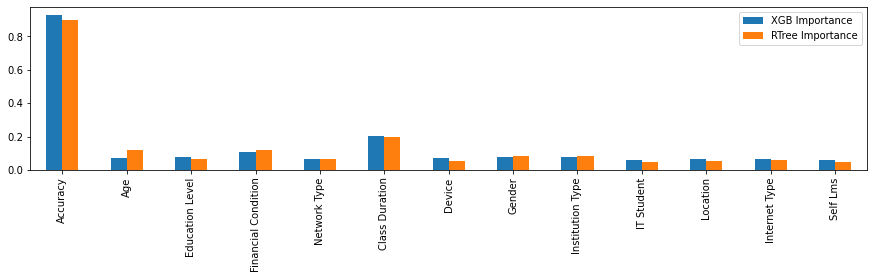

In [484]:
combine.plot(kind="bar",figsize=(15,3))